## Vehicle Detection Project

In [1]:
# Pipeline for Project 5
# 1. Extract Features from images
# 2. Train Classifier
# 3. Sliding window to make detections in images

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pdb
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
%matplotlib inline
test_mode = True

In [2]:
# Method for printing images
def print_image(img, title = ""):
    plt.figure(figsize=(7, 7))
    plt.imshow(img)
    plt.title(title)
    
def print_gray_image(img, title = ""):
    plt.figure(figsize=(7, 7))
    plt.imshow(img, cmap="gray")
    plt.title(title)

In [3]:
### HOG features
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features



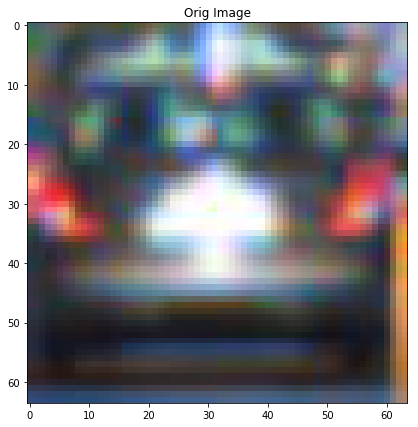

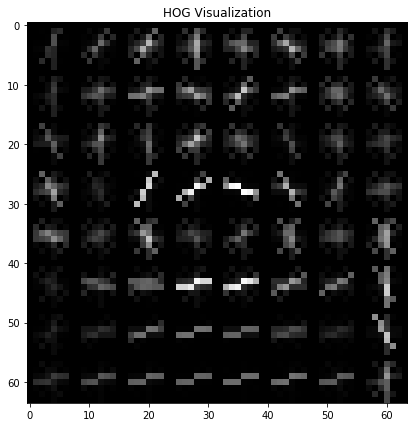

In [7]:
# Read in our vehicles and non-vehicles
cars = glob.glob('/Users/Akshay/projects/carnd/CarND-Vehicle-Detection/feature_extraction_data/vehicles/*.jpeg')
notcars = glob.glob('/Users/Akshay/projects/carnd/CarND-Vehicle-Detection/feature_extraction_data/non-vehicles/*.jpeg')
        
# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, 
                                       orient, 
                                       pix_per_cell, 
                                       cell_per_block, 
                                       vis=True, 
                                       feature_vec=False)

if test_mode:
    print_image(image, 'Orig Image')
    print_gray_image(hog_image, 'HOG Visualization')